In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:

raw_df = pd.read_csv("./data/data_asia.csv")
raw_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Literacy rate,Year,Country
0,41128771.0,20362329.0,20766442.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,Afghanistan
1,40099462.0,19844584.0,20254878.0,35.842,7.344,9.0,NaN,NaN,NaN,NaN,...,17.86,NaN,58.915,65.279,NaN,NaN,NaN,55.929401,2021,Afghanistan
2,38972230.0,19279930.0,19692301.0,36.051,7.113,9.0,18.48131,45.98341,53.91368,26.41834,...,17.58,NaN,59.866,65.432,NaN,10.85844,NaN,NaN,2020,Afghanistan
3,37769499.0,18679089.0,19090409.0,36.466,6.791,9.0,18.33941,44.51263,59.36147,24.07933,...,18.51,NaN,60.619,66.677,110.007507,NaN,86.175522,NaN,2019,Afghanistan
4,36686784.0,18136922.0,18549862.0,36.927,6.981,9.0,18.12015,44.39712,63.66947,23.55313,...,17.96,NaN,59.923,66.458,107.780533,9.96379,88.735519,NaN,2018,Afghanistan


In [3]:

shape = raw_df.shape
print(f"Current shape: {shape}")

if shape[0] > 1000:
    print(f"Your data good!.")
else:
    print(f"Your raw data absolutely small. Please choose larger year interval.!")

Current shape: (1316, 26)
Your data good!.


In [4]:

index = raw_df.index
detectDupSeries = index.duplicated(keep='first')
num_duplicated_rows = detectDupSeries.sum()
if num_duplicated_rows == 0:
    print(f"Your raw data have no duplicated line.!")
else:
    if num_duplicated_rows > 1:
        ext = "lines"
    else:
        ext = "line"
    print(f"Your raw data have {num_duplicated_rows} duplicated " + ext + ". Please de-deduplicate your raw data.!")

Your raw data have no duplicated line.!


In [5]:
# De-deduplicate your raw data
# Get the index of the DataFrame
index = raw_df.index

# Detect duplicate rows and keep the first occurrence
detectDupSeries = index.duplicated(keep='first')

# Count the number of duplicated rows
num_duplicated_rows = detectDupSeries.sum()

# TEST
if num_duplicated_rows == 0:
    print(f"Your raw data have no duplicated line.!")
else:
    if num_duplicated_rows > 1:
        ext = "lines"
    else:
        ext = "line"
    print(f"Your raw data have {num_duplicated_rows} duplicated " + ext + ". Please de-deduplicate your raw data.!")

Your raw data have no duplicated line.!


In [6]:
dtypes = raw_df.dtypes
dtypes

Total Population                              float64
Female Population                             float64
Male Population                               float64
Birth Rate                                    float64
Death Rate                                    float64
Compulsory Education Dur.                     float64
Employment in Industry(%)                     float64
Employment in Agriculture(%)                  float64
Female Employment in Agriculture(%)           float64
Female Employment in Industry(%)              float64
Unemployment(%)                               float64
GDP in USD                                    float64
National Income per Capita                    float64
Net income from Abroad                        float64
Agriculture value added(in USD)               float64
Electric Power Consumption(kWH per capita)    float64
Renewable Energy Consumption (%)              float64
Fossil Fuel Consumption (%)                   float64
Male life expectancy        

In [7]:
raw_df["Year"] = raw_df["Year"].astype(str)
dtypes = raw_df.dtypes
float_cols = set(dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
assert len(float_cols) == 24
object_cols = set(dtypes[dtypes == object].index)
assert len(object_cols) == 2

In [8]:
num_col_info_df = raw_df.select_dtypes(exclude='object')

def missing_ratio(s):
    return (s.isna().mean() * 100).round(1)
   
def median(df):
    return (df.quantile(0.5)).round(1)

def lower_quartile(df):
    return (df.quantile(0.25)).round(1)

def upper_quartile(df):
    return (df.quantile(0.75)).round(1)

num_col_info_df = num_col_info_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Agriculture value added(in USD),Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Literacy rate
missing_ratio,0.000000e+00,0.0,0.0,3.600,3.600,20.9,3.700000,3.70000,3.700000,3.700000,...,7.700000e+00,34.300000,6.80,38.5,3.600,3.600,23.900000,30.200000,43.600000,79.700000
min,2.582080e+05,124951.0,133257.0,5.100,0.795,5.0,3.519346,0.32473,0.007847,1.773412,...,4.972527e+07,13.187383,0.00,0.0,51.039,54.087,22.162991,0.212900,17.885321,46.990051
lower_quartile,4.382818e+06,2121473.0,2311564.5,15.100,4.800,8.0,16.200000,6.10000,3.100000,7.800000,...,8.504446e+08,723.300000,1.00,63.6,64.400,70.100,96.700000,14.800000,90.200000,94.600000
median,1.822701e+07,9013541.5,9061772.5,19.800,6.200,9.0,21.000000,29.10000,30.100000,11.900000,...,3.638505e+09,1814.500000,5.30,90.1,68.500,74.700,100.900000,28.800000,96.600000,98.700000
upper_quartile,6.135766e+07,30517285.0,30801407.8,24.600,7.600,10.0,25.800000,45.40000,52.200000,16.200000,...,2.134342e+10,5101.600000,35.80,98.2,73.300,78.400,106.800000,46.700000,100.400000,99.700000
max,1.417173e+09,691528501.0,731180498.0,52.073,16.700,15.0,59.578700,85.41296,89.413740,39.333190,...,1.311311e+12,21230.075563,94.37,100.0,83.100,87.710,150.354233,125.763786,134.545609,100.000000


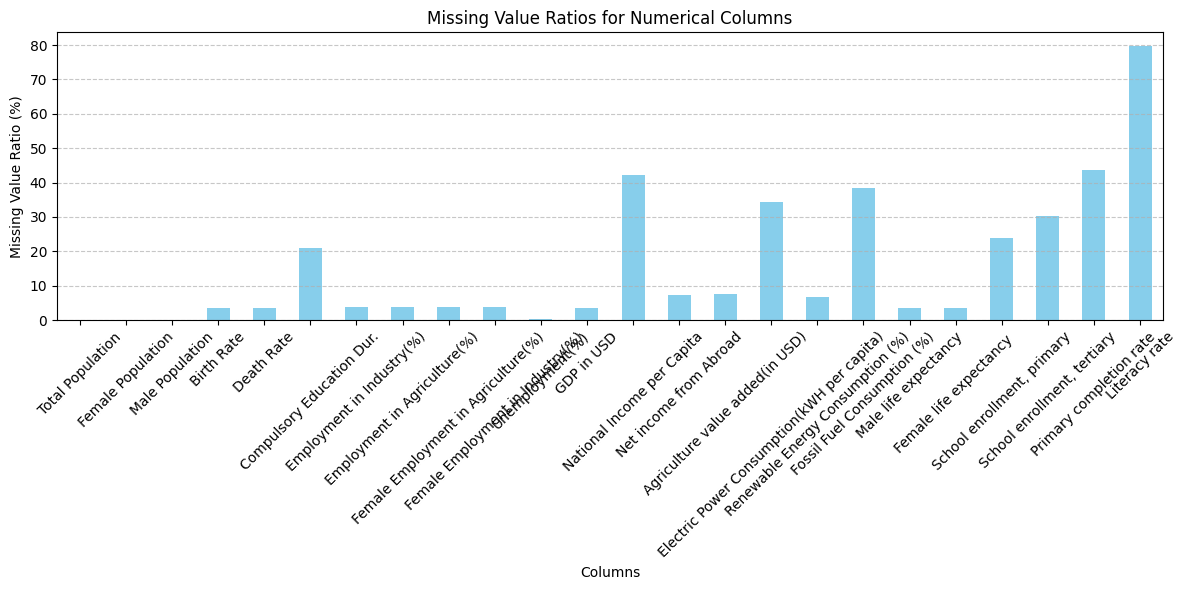

In [9]:
plt.figure(figsize=(12, 6))
missing_ratios = num_col_info_df.loc['missing_ratio']
missing_ratios.plot(kind='bar', color='skyblue')
plt.title('Missing Value Ratios for Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Missing Value Ratio (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [10]:
assert num_col_info_df["Total Population"]["missing_ratio"] == 0
dict(num_col_info_df.iloc[0])

{'Total Population': 0.0,
 'Female Population': 0.0,
 'Male Population': 0.0,
 'Birth Rate': 3.6,
 'Death Rate': 3.6,
 'Compulsory Education Dur.': 20.9,
 'Employment in Industry(%)': 3.7,
 'Employment in Agriculture(%)': 3.7,
 'Female Employment in Agriculture(%)': 3.7,
 'Female Employment in Industry(%)': 3.7,
 'Unemployment(%)': 0.4,
 'GDP in USD': 3.5,
 'National Income per Capita': 42.2,
 'Net income from Abroad': 7.4,
 'Agriculture value added(in USD)': 7.7,
 'Electric Power Consumption(kWH per capita)': 34.3,
 'Renewable Energy Consumption (%)': 6.8,
 'Fossil Fuel Consumption (%)': 38.5,
 'Male life expectancy': 3.6,
 'Female life expectancy ': 3.6,
 'School enrollment, primary': 23.9,
 'School enrollment, tertiary': 30.2,
 'Primary completion rate': 43.6,
 'Literacy rate': 79.7}

In [11]:
def drop_missing_features(df: pd.DataFrame, missing_lst: dict = dict(num_col_info_df.iloc[0]), threshold: float = 75.0) -> pd.DataFrame:
    if (df is None) or (missing_lst is None) or (threshold is None):
        print(f"[LOG] Invalid.")
        raise ValueError
    df_cp = df.copy()
    
    cols_to_trim = []
    
    for key, value in missing_lst.items():
        if float(value) > threshold:
            cols_to_trim.append(key)
            
    if len(cols_to_trim) > 0:
        df_cp = df_cp.drop(columns=cols_to_trim)
        print("[LOG] Dropped column(s): " + " ".join(cols_to_trim))
    else:
        print("[LOG] Have no column(s) to trim.")
        
    return df_cp

In [12]:
# raw_df = drop_missing_features(raw_df, dict(num_col_info_df.iloc[0]))


In [13]:
# TEST
raw_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Literacy rate,Year,Country
0,41128771.0,20362329.0,20766442.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,Afghanistan
1,40099462.0,19844584.0,20254878.0,35.842,7.344,9.0,NaN,NaN,NaN,NaN,...,17.86,NaN,58.915,65.279,NaN,NaN,NaN,55.929401,2021,Afghanistan
2,38972230.0,19279930.0,19692301.0,36.051,7.113,9.0,18.48131,45.98341,53.91368,26.41834,...,17.58,NaN,59.866,65.432,NaN,10.85844,NaN,NaN,2020,Afghanistan
3,37769499.0,18679089.0,19090409.0,36.466,6.791,9.0,18.33941,44.51263,59.36147,24.07933,...,18.51,NaN,60.619,66.677,110.007507,NaN,86.175522,NaN,2019,Afghanistan
4,36686784.0,18136922.0,18549862.0,36.927,6.981,9.0,18.12015,44.39712,63.66947,23.55313,...,17.96,NaN,59.923,66.458,107.780533,9.96379,88.735519,NaN,2018,Afghanistan


After remove features which have large missing values, our dataframe still have missing values. So that, we need to fill these missing values so that they can be used in analysis.

In [14]:
def filling_missing_value(df: pd.DataFrame) -> pd.DataFrame:
    if (df is None):
        print(f"[LOG] Invalid.")
        raise ValueError

    df_cp = df.copy()
    

    cols_list = list(df_cp.columns)
    

    cols_list.remove("Country")
    cols_list.remove("Year")
    
    df_cp.fillna(value=np.nan, inplace=True)
    
    for col in cols_list:
        df_cp[col].fillna((df_cp[col].median()), inplace=True)
        
    return df_cp
    

In [15]:
raw_df = filling_missing_value(df=raw_df)

In [16]:
raw_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Literacy rate,Year,Country
0,41128771.0,20362329.0,20766442.0,19.841,6.208,9.0,20.98223,29.10045,30.14557,11.87949,...,5.285,90.124928,68.479,74.716,100.911263,28.845509,96.636715,98.709351,2022,Afghanistan
1,40099462.0,19844584.0,20254878.0,35.842,7.344,9.0,20.98223,29.10045,30.14557,11.87949,...,17.860,90.124928,58.915,65.279,100.911263,28.845509,96.636715,55.929401,2021,Afghanistan
2,38972230.0,19279930.0,19692301.0,36.051,7.113,9.0,18.48131,45.98341,53.91368,26.41834,...,17.580,90.124928,59.866,65.432,100.911263,10.858440,96.636715,98.709351,2020,Afghanistan
3,37769499.0,18679089.0,19090409.0,36.466,6.791,9.0,18.33941,44.51263,59.36147,24.07933,...,18.510,90.124928,60.619,66.677,110.007507,28.845509,86.175522,98.709351,2019,Afghanistan
4,36686784.0,18136922.0,18549862.0,36.927,6.981,9.0,18.12015,44.39712,63.66947,23.55313,...,17.960,90.124928,59.923,66.458,107.780533,9.963790,88.735519,98.709351,2018,Afghanistan


In [17]:
raw_df.select_dtypes(exclude='object').agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Agriculture value added(in USD),Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Literacy rate
missing_ratio,0.000000e+00,0.0,0.0,0.000,0.000,0.0,0.000000,0.00000,0.000000,0.000000,...,0.000000e+00,0.000000,0.00,0.0,0.000,0.000,0.000000,0.000000,0.000000,0.000000
min,2.582080e+05,124951.0,133257.0,5.100,0.795,5.0,3.519346,0.32473,0.007847,1.773412,...,4.972527e+07,13.187383,0.00,0.0,51.039,54.087,22.162991,0.212900,17.885321,46.990051
lower_quartile,4.382818e+06,2121473.0,2311564.5,15.300,4.900,9.0,16.300000,6.60000,3.800000,8.000000,...,1.006268e+09,1377.700000,1.20,81.5,64.600,70.300,97.900000,19.700000,95.500000,98.700000
median,1.822701e+07,9013541.5,9061772.5,19.800,6.200,9.0,21.000000,29.10000,30.100000,11.900000,...,3.638505e+09,1814.500000,5.30,90.1,68.500,74.700,100.900000,28.800000,96.600000,98.700000
upper_quartile,6.135766e+07,30517285.0,30801407.8,24.300,7.500,9.0,25.500000,44.90000,51.100000,16.000000,...,1.865373e+10,2447.900000,33.10,95.3,73.100,78.300,104.800000,38.900000,97.600000,98.700000
max,1.417173e+09,691528501.0,731180498.0,52.073,16.700,15.0,59.578700,85.41296,89.413740,39.333190,...,1.311311e+12,21230.075563,94.37,100.0,83.100,87.710,150.354233,125.763786,134.545609,100.000000


In [18]:
pd.set_option('display.max_colwidth', 100) # For clearly
pd.set_option('display.max_columns', None) # For clearly

In [19]:

cat_col_info_df = raw_df.select_dtypes(include='object')

def missing_ratio(s):
    return (s.isna().mean() * 100).round(1)

def num_values(s):
    s = s.str.split(';')
    s = s.explode()
    return len(s.value_counts())

def value_ratios(s):
    s = s.str.split(';')
    s = s.explode()
    totalCount = (~s.isna()).sum()
    return ((s.value_counts()/totalCount*100).round(1)).to_dict()

cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,Year,Country
missing_ratio,0.0,0.0
num_values,28,47
value_ratios,"{'2022': 3.6, '2021': 3.6, '1996': 3.6, '1997': 3.6, '1998': 3.6, '1999': 3.6, '2000': 3.6, '200...","{'Afghanistan': 2.1, 'Saudi Arabia': 2.1, 'Maldives': 2.1, 'Mongolia': 2.1, 'Myanmar': 2.1, 'Nep..."


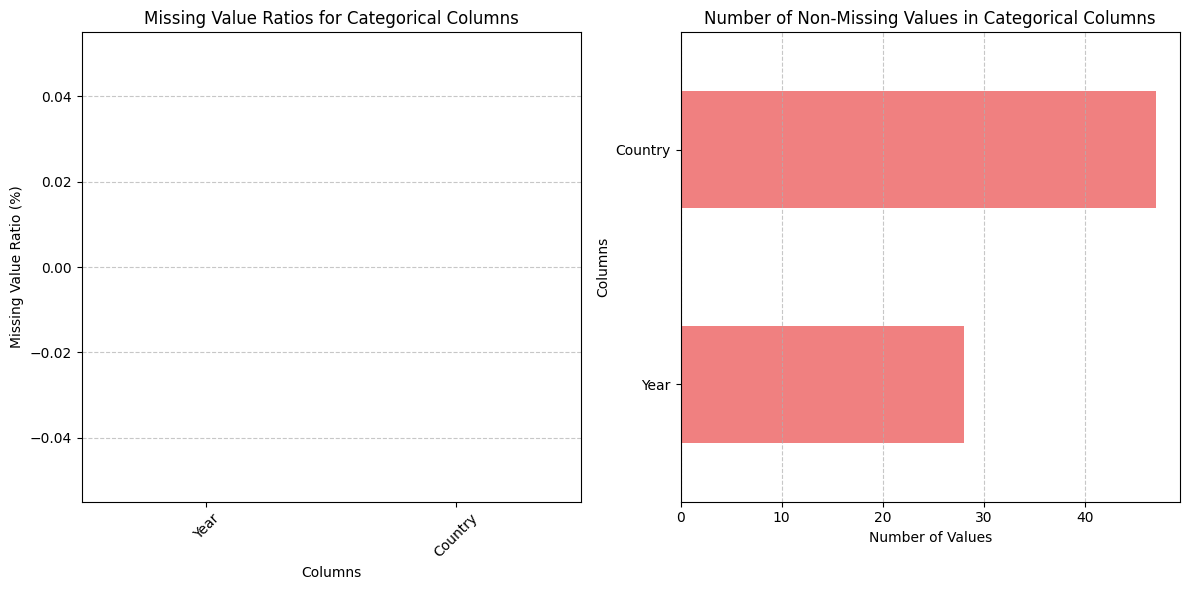

In [20]:
plt.figure(figsize=(12, 6))

missing_ratios = cat_col_info_df.loc['missing_ratio']
plt.subplot(1, 2, 1)
missing_ratios.plot(kind='bar', color='skyblue')
plt.title('Missing Value Ratios for Categorical Columns')
plt.xlabel('Columns')
plt.ylabel('Missing Value Ratio (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

num_non_missing_values = cat_col_info_df.loc['num_values']
plt.subplot(1, 2, 2)
num_non_missing_values.sort_values().plot(kind='barh', color='lightcoral')
plt.title('Number of Non-Missing Values in Categorical Columns')
plt.xlabel('Number of Values')
plt.ylabel('Columns')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [21]:
def checking_population(df: pd.DataFrame) -> bool:
    return df["Total Population"].equals((df["Female Population"] + df["Male Population"]))

In [22]:
checking_population(raw_df) == True

False

In [23]:
sum(raw_df["Total Population"] - (raw_df["Female Population"] + raw_df["Male Population"]))

-17.0

In [24]:
raw_df["Female Population"] = raw_df["Total Population"] - raw_df["Male Population"]

In [25]:
checking_population(raw_df) == True

True

In [26]:
def checking_population(df: pd.DataFrame) -> bool:

    population_check = df["Total Population"].equals(df["Female Population"] + df["Male Population"])
    
    if not population_check:
        df["Female Population"] = df["Total Population"] - df["Male Population"]
    
    return True 

is_reasonable = checking_population(raw_df)

if not is_reasonable:
    is_reasonable = checking_population(raw_df)

if is_reasonable:
    print("Population data is reasonable.")
else:
    print("Population data has been corrected.")


Population data is reasonable.


In [27]:
print(f"Total number of features: {raw_df.shape[1]}")
raw_df.dtypes

Total number of features: 26


Total Population                              float64
Female Population                             float64
Male Population                               float64
Birth Rate                                    float64
Death Rate                                    float64
Compulsory Education Dur.                     float64
Employment in Industry(%)                     float64
Employment in Agriculture(%)                  float64
Female Employment in Agriculture(%)           float64
Female Employment in Industry(%)              float64
Unemployment(%)                               float64
GDP in USD                                    float64
National Income per Capita                    float64
Net income from Abroad                        float64
Agriculture value added(in USD)               float64
Electric Power Consumption(kWH per capita)    float64
Renewable Energy Consumption (%)              float64
Fossil Fuel Consumption (%)                   float64
Male life expectancy        

In [28]:
your_continent = "./data/asia"
save_name = "_".join([str(your_continent)]) + "_processed.csv"
raw_df.to_csv(save_name, index=False)